In [1]:
import torch
import sklearn

In [2]:
from sklearn.datasets import make_classification
torch.manual_seed(123)

In [3]:
## Make a Toy Dataset
X,y=make_classification(n_samples=1000,n_features=4 ,n_classes=2)

### Change it into the Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)





In [4]:
### Data Suffling
torch.manual_seed(10)
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:10]

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])

In [5]:
#### Train Test split
train_size=int(suffle_idx.size(0)*0.7)
train_idx= suffle_idx[:train_size]
test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [9]:
X_train.shape

torch.Size([700, 4])

In [10]:
X_test.shape

torch.Size([300, 4])

In [11]:
#### Normalize

mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [12]:
import torch.nn as nn
from torch.autograd import grad

In [13]:
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)


In [8]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:

      ###1. Compute the output
      yhat=model.forward(x[idx])

      ###2. Compute the Error
      loss=loss_fn(yhat,y[idx])

      ###3. Compute the gradient
      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      ###4. Update Model Parameters
      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b

    ###5. Log and print the loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost




In [14]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.48255
Epoc:   2 | MSE  0.45399
Epoc:   3 | MSE  0.42822
Epoc:   4 | MSE  0.40491
Epoc:   5 | MSE  0.38373
Epoc:   6 | MSE  0.36445
Epoc:   7 | MSE  0.34684
Epoc:   8 | MSE  0.33072
Epoc:   9 | MSE  0.31592
Epoc:  10 | MSE  0.30230
Epoc:  11 | MSE  0.28973
Epoc:  12 | MSE  0.27809
Epoc:  13 | MSE  0.26732
Epoc:  14 | MSE  0.25733
Epoc:  15 | MSE  0.24803
Epoc:  16 | MSE  0.23937
Epoc:  17 | MSE  0.23128
Epoc:  18 | MSE  0.22373
Epoc:  19 | MSE  0.21667
Epoc:  20 | MSE  0.21006
Epoc:  21 | MSE  0.20386
Epoc:  22 | MSE  0.19805
Epoc:  23 | MSE  0.19259
Epoc:  24 | MSE  0.18745
Epoc:  25 | MSE  0.18263
Epoc:  26 | MSE  0.17809
Epoc:  27 | MSE  0.17381
Epoc:  28 | MSE  0.16978
Epoc:  29 | MSE  0.16599
Epoc:  30 | MSE  0.16241
Epoc:  31 | MSE  0.15904
Epoc:  32 | MSE  0.15585
Epoc:  33 | MSE  0.15284
Epoc:  34 | MSE  0.15000
Epoc:  35 | MSE  0.14733
Epoc:  36 | MSE  0.14480
Epoc:  37 | MSE  0.14241
Epoc:  38 | MSE  0.14015
Epoc:  39 | MSE  0.13802
Epoc:  40 | MSE  0.13600


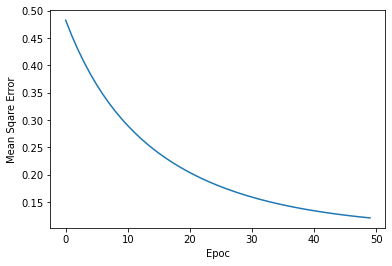

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.show()

In [16]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))


Training Accuracy: 85.00
Testing Accuracy: 84.00


### Model Using Pytorch

In [27]:
import torch
import sklearn
import torch.nn.functional as F

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
### Create The dataset
X,y=make_classification(n_samples=1000,n_classes=2,n_features=4)

### Normalize the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Array to Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [21]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)



    

In [22]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.mse_loss(yhat,y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [23]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [24]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.49435
Epoc:   2 | MSE  0.47153
Epoc:   3 | MSE  0.45005
Epoc:   4 | MSE  0.42983
Epoc:   5 | MSE  0.41079
Epoc:   6 | MSE  0.39286
Epoc:   7 | MSE  0.37598
Epoc:   8 | MSE  0.36008
Epoc:   9 | MSE  0.34511
Epoc:  10 | MSE  0.33101
Epoc:  11 | MSE  0.31772
Epoc:  12 | MSE  0.30520
Epoc:  13 | MSE  0.29342
Epoc:  14 | MSE  0.28232
Epoc:  15 | MSE  0.27186
Epoc:  16 | MSE  0.26201
Epoc:  17 | MSE  0.25274
Epoc:  18 | MSE  0.24400
Epoc:  19 | MSE  0.23576
Epoc:  20 | MSE  0.22801
Epoc:  21 | MSE  0.22070
Epoc:  22 | MSE  0.21382
Epoc:  23 | MSE  0.20733
Epoc:  24 | MSE  0.20123
Epoc:  25 | MSE  0.19547
Epoc:  26 | MSE  0.19004
Epoc:  27 | MSE  0.18493
Epoc:  28 | MSE  0.18012
Epoc:  29 | MSE  0.17558
Epoc:  30 | MSE  0.17131
Epoc:  31 | MSE  0.16728
Epoc:  32 | MSE  0.16348
Epoc:  33 | MSE  0.15990
Epoc:  34 | MSE  0.15653
Epoc:  35 | MSE  0.15336
Epoc:  36 | MSE  0.15037
Epoc:  37 | MSE  0.14755
Epoc:  38 | MSE  0.14489
Epoc:  39 | MSE  0.14238
Epoc:  40 | MSE  0.14002


[]

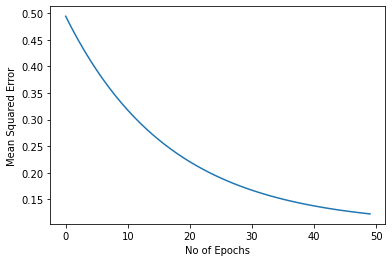

In [25]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [26]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.90
Testing Accuracy: 0.92


### Logistic Regression

In [37]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.binary_cross_entropy(torch.sigmoid(yhat),y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [45]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [46]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.51359
Epoc:   2 | MSE  0.50871
Epoc:   3 | MSE  0.50391
Epoc:   4 | MSE  0.49920
Epoc:   5 | MSE  0.49458
Epoc:   6 | MSE  0.49005
Epoc:   7 | MSE  0.48560
Epoc:   8 | MSE  0.48124
Epoc:   9 | MSE  0.47697
Epoc:  10 | MSE  0.47277
Epoc:  11 | MSE  0.46867
Epoc:  12 | MSE  0.46464
Epoc:  13 | MSE  0.46069
Epoc:  14 | MSE  0.45683
Epoc:  15 | MSE  0.45304
Epoc:  16 | MSE  0.44933
Epoc:  17 | MSE  0.44571
Epoc:  18 | MSE  0.44216
Epoc:  19 | MSE  0.43868
Epoc:  20 | MSE  0.43528
Epoc:  21 | MSE  0.43196
Epoc:  22 | MSE  0.42871
Epoc:  23 | MSE  0.42553
Epoc:  24 | MSE  0.42243
Epoc:  25 | MSE  0.41939
Epoc:  26 | MSE  0.41643
Epoc:  27 | MSE  0.41354
Epoc:  28 | MSE  0.41072
Epoc:  29 | MSE  0.40797
Epoc:  30 | MSE  0.40528
Epoc:  31 | MSE  0.40266
Epoc:  32 | MSE  0.40011
Epoc:  33 | MSE  0.39763
Epoc:  34 | MSE  0.39521
Epoc:  35 | MSE  0.39286
Epoc:  36 | MSE  0.39057
Epoc:  37 | MSE  0.38834
Epoc:  38 | MSE  0.38618
Epoc:  39 | MSE  0.38407
Epoc:  40 | MSE  0.38203


[]

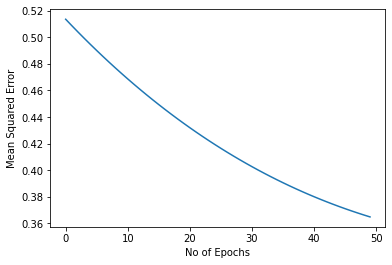

In [47]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [48]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.51
Testing Accuracy: 0.57
